# **Laboratorio 12 - Proyecto de Consultoría - SparkML**


- Mónica Salvatierra 22249
- Derek Arreaga 22537

Link del repositorio: https://github.com/alee2602/LAB12-DS

### **Importación de librerías**

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg, stddev, min as min_, max as max_
from pyspark.sql.functions import sum as _sum, when
import seaborn as sns
import matplotlib.pyplot as plt

### **Iniciar sesión en Spark**

In [2]:
spark = (
    SparkSession.builder
    .appName("Análisis de Hackeo")
    .getOrCreate()
)

spark


25/10/27 16:39:40 WARN Utils: Your hostname, DESKTOP-NK707BG resolves to a loopback address: 127.0.1.1; using 172.22.98.149 instead (on interface eth0)
25/10/27 16:39:40 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/10/27 16:39:43 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


### **Carga de datos**

In [5]:
df = spark.read.csv("hack_data.csv", header=True, inferSchema=True)

In [6]:
df.printSchema()

root
 |-- Session_Connection_Time: double (nullable = true)
 |-- Bytes Transferred: double (nullable = true)
 |-- Kali_Trace_Used: integer (nullable = true)
 |-- Servers_Corrupted: double (nullable = true)
 |-- Pages_Corrupted: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- WPM_Typing_Speed: double (nullable = true)



In [7]:
df.show(5)

+-----------------------+-----------------+---------------+-----------------+---------------+--------------------+----------------+
|Session_Connection_Time|Bytes Transferred|Kali_Trace_Used|Servers_Corrupted|Pages_Corrupted|            Location|WPM_Typing_Speed|
+-----------------------+-----------------+---------------+-----------------+---------------+--------------------+----------------+
|                    8.0|           391.09|              1|             2.96|            7.0|            Slovenia|           72.37|
|                   20.0|           720.99|              0|             3.04|            9.0|British Virgin Is...|           69.08|
|                   31.0|           356.32|              1|             3.71|            8.0|             Tokelau|           70.58|
|                    2.0|           228.08|              1|             2.48|            8.0|             Bolivia|            70.8|
|                   20.0|            408.5|              0|             3.57

El dataset brindado consiste de **7** columnas con la siguiente descripción:
- ``Session_Connection_Time`` - **double**: 
- ``Bytes Transferred`` - **double**: 
- ``Kali_Trace_Used`` - **integer**: 
- ``Servers_Corrupted`` - **double**: 
- ``Pages_Corrupted`` - **double**:  
- ``Location`` - **string**: Ubicación del ataque 
- ``WPM_Typing_Speed`` - **double**: Velocidad de typeo medido en la cantidad de palabras por minuto

### **Matriz de Correlación**

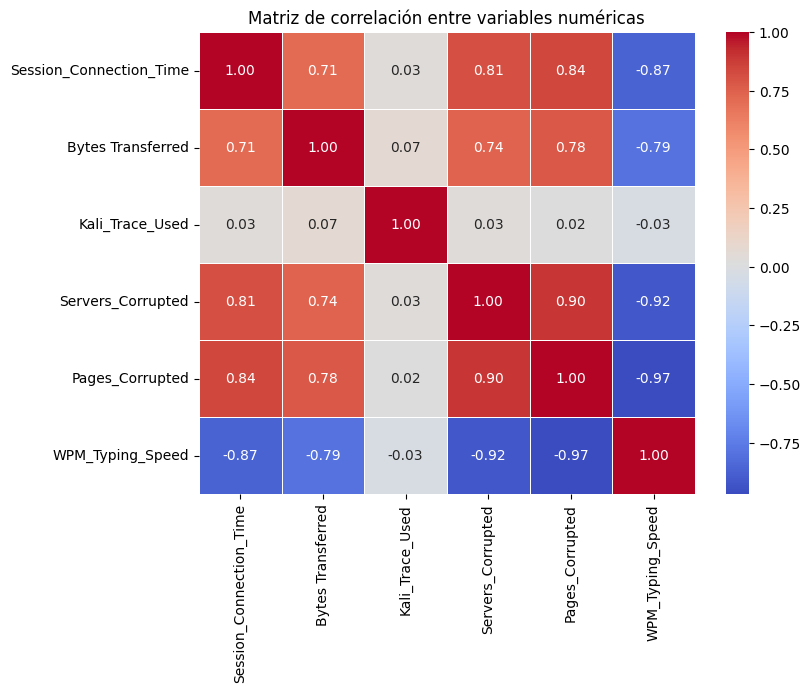

In [13]:
num_cols = ["Session_Connection_Time", "Bytes Transferred", "Kali_Trace_Used", "Servers_Corrupted", "Pages_Corrupted", "WPM_Typing_Speed"]
pdf = df.select(num_cols).toPandas()

corr_matrix = pdf.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

1. Visualizar cantidad de valores nulos y tratarlos de ser necesario
2. Observar las distribuciones de las variables numéricas
3. Codificar la variable de localización
4. Realizar la división de conjuntos para entrenamiento y tests
5. Crear pipeline con el modelo de clustering con K-Means